# **MLB Project**
**┗ 미국 프로야구 Los Angeles Angels의 선수 영입 리스트**
---

> **목차(Context)**
* 🥇Session 1 - 「Los Angeles Angels 문제」
* 🥈Session 2 - 「Los Angeles Angels 원인」
* 🥉Session 3 - 「Los Angeles Angels 해결 방안」

## **🥇Session 1. Los Angeles Angels 문제**  
---

> **겉으로 보이는 현상**

```
Los Angeles Angels는 현역 최고의 타자 마이크 트라웃과 MVP급 활약을 보이는 오타니를 보유하고 있다. 
하지만, 팀은 득점에 있어 좋은 성적을 보이지 못 하고 있다.
```  

> **문제 정의**

```
미국 프로야구(Major League Baseball)팀인 Los Angeles Angels의 득점력이 부족하다.
```  

> **목적 정의**

```
팀의 득점력을 높일 수 있는 선수를 영입하려고 한다.
```

> **지표 정의**

```
득점력을 나타내는 지표로 2가지를 정의한다.
경기당 득점(R/G) - 한 경기 당 득점을 나타낸다.
타석당 득점(R/PA) - 한 타석 당 득점을 나타난다.
```

문제 해결에 필요한 데이터는 [FanGraph.com](https://www.fangraphs.com), [BaseballReference.com](https://www.baseball-reference.com/) 을 참고했습니다.

### 1.1 현황 파악

Los Angeles Angels의 실제 득점력이 정말 부족한지 확인하기 위한 과정을 진행한다.

In [ ]:
!pip install feature-engine==0.3.0

In [ ]:
# Baseball Reference를 통해 최근 10년(2013 - 2022) 동안 모든 팀의 데이터를 수집합니다.

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame()

for year in range(2013, 2023):
    fpath = '/content/drive/MyDrive/MLB Project/Team Statistics/{}_MLB_team_statistics.xlsx'.format(year)
    temp_df = pd.read_excel(fpath)
    temp_df['Year'] = year

    df = pd.concat([df, temp_df], axis=0)

df['R/PA'] = df['R'] / df['PA']
df['Tm'].replace({'Los Angeles Angels of Anaheim':'Los Angeles Angels',
                  'Cleveland Indians':'Cleveland Guardians'}, inplace=True)

df = df.reset_index(drop=True)
df

,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,...,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,Year,R/PA
0,Arizona Diamondbacks,44.0,28.1,4.23,162.0,6334.0,5676.0,685.0,1468.0,302.0,...,96.0,2222.0,160.0,43.0,50.0,43.0,51.0,1160.0,2013,0.108147
1,Atlanta Braves,44.0,26.8,4.25,162.0,6133.0,5441.0,688.0,1354.0,247.0,...,99.0,2186.0,119.0,55.0,58.0,35.0,36.0,1132.0,2013,0.112180
2,Baltimore Orioles,52.0,27.8,4.60,162.0,6144.0,5620.0,745.0,1460.0,298.0,...,101.0,2422.0,105.0,36.0,27.0,45.0,36.0,1053.0,2013,0.121257
3,Boston Red Sox,48.0,29.6,5.27,162.0,6382.0,5651.0,853.0,1566.0,363.0,...,116.0,2521.0,137.0,72.0,24.0,50.0,51.0,1212.0,2013,0.133657
4,Chicago Cubs,56.0,27.9,3.72,162.0,6079.0,5498.0,602.0,1307.0,297.0,...,89.0,2156.0,120.0,67.0,43.0,30.0,28.0,1092.0,2013,0.099029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Tampa Bay Rays,61.0,27.0,4.11,162.0,6008.0,5412.0,666.0,1294.0,296.0,...,100.0,2041.0,93.0,57.0,7.0,31.0,13.0,1074.0,2022,0.110852
306,Texas Rangers,55.0,28.0,4.36,162.0,6029.0,5478.0,707.0,1308.0,224.0,...,98.0,2166.0,82.0,47.0,10.0,38.0,12.0,1007.0,2022,0.117267
307,Toronto Blue Jays,51.0,27.1,4.78,162.0,6158.0,5555.0,775.0,1464.0,307.0,...,116.0,2395.0,136.0,55.0,8.0,33.0,13.0,1111.0,2022,0.125853
308,Washington Nationals,55.0,28.7,3.72,162.0,5998.0,5434.0,603.0,1351.0,252.0,...,99.0,2051.0,141.0,60.0,20.0,37.0,12.0,1099.0,2022,0.100534


In [ ]:
# LA Angels의 최근 10년간 경기당 득점 / 타석수 당 득점의 흐름을 살펴본다.
df_copy = df.copy()
laa_df = df_copy[df_copy['Tm'] == 'Los Angeles Angels']

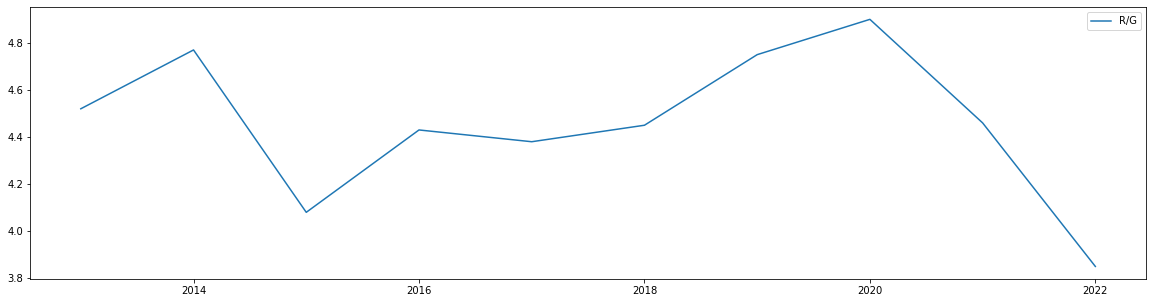

In [ ]:
# 최근 10년간의 경기당 득점
plt.plot(laa_df['Year'], laa_df['R/G'], label='R/G')

plt.gcf().set_size_inches(20, 5)
plt.legend()
plt.show()

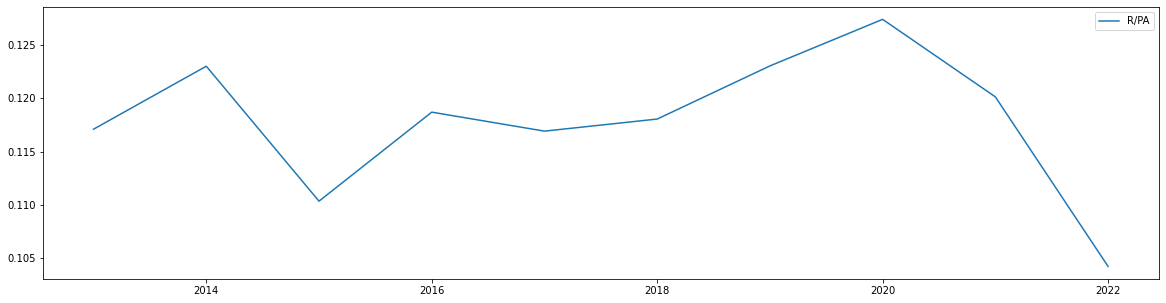

In [ ]:
# 최근 10년간의 타석당 득점
plt.plot(laa_df['Year'], laa_df['R/PA'], label='R/PA')

plt.gcf().set_size_inches(20, 5)
plt.legend()
plt.show()

> **현황 파악**

```
2015 - 2020 년까지는 득점의 양(경기당 득점)과 질(타석당 득점)에서 증가하는 추세였다.
하지만, 최근 2년 동안은 득점의 양과 질에서 모두 하락하는 추세이다.
작년 득점과 관련된 지표는 최근 10년 중에서 가장 나쁜 성적이다.
```

### 1.2 평가

```
LA Angels의 득점력과 관련된 지표의 변화가 일반적인 흐름인지 아니면, LA Angels 만의 특별한 문제인지 확인합니다. 

LA Angels에 대해 올바른 평가를 위해 2개의 비교군을 선정합니다.
1) 리그 전체
2) LA Angles와 같은 소속에 속한 팀
```

#### 리그 전체와의 비교

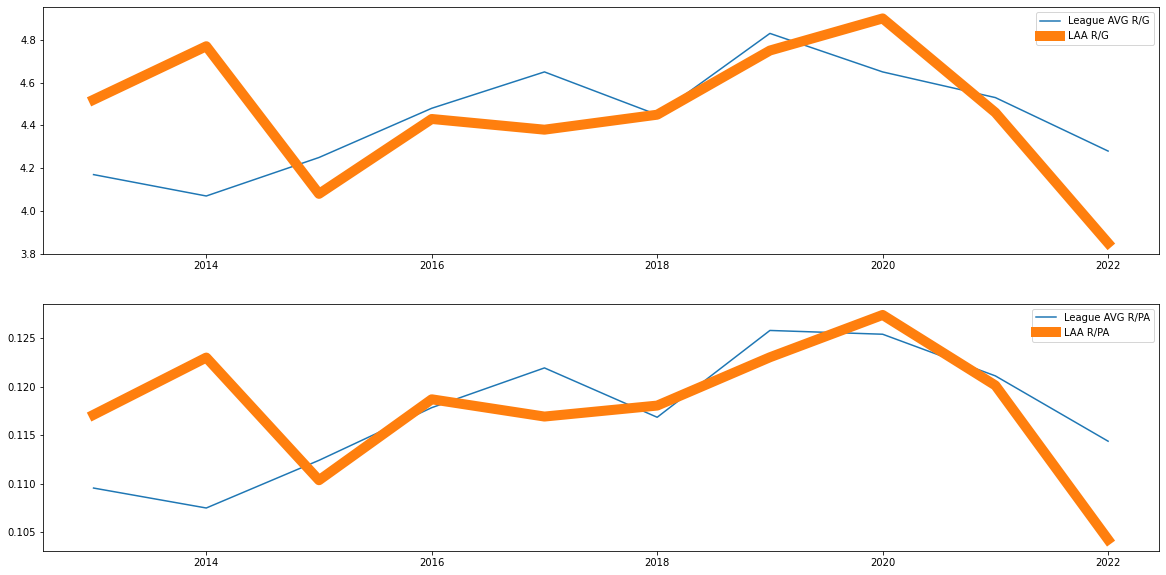

In [ ]:
# 리그 전체와 LA Angles와의 비교
league_df = df_copy[df_copy['Tm'] == 'League Average']

fig, axes = plt.subplots(2, 1, figsize=(20, 10))

# 경기당 득점
axes[0].plot(league_df['Year'], league_df['R/G'], label='League AVG R/G')
axes[0].plot(laa_df['Year'], laa_df['R/G'], label='LAA R/G', linewidth=10)
axes[0].legend()

# 타석당 득점
axes[1].plot(league_df['Year'], league_df['R/PA'], label='League AVG R/PA')
axes[1].plot(laa_df['Year'], laa_df['R/PA'], label='LAA R/PA', linewidth=10)
axes[1].legend()

plt.show()

#### 같은 소속 팀들과의 비교

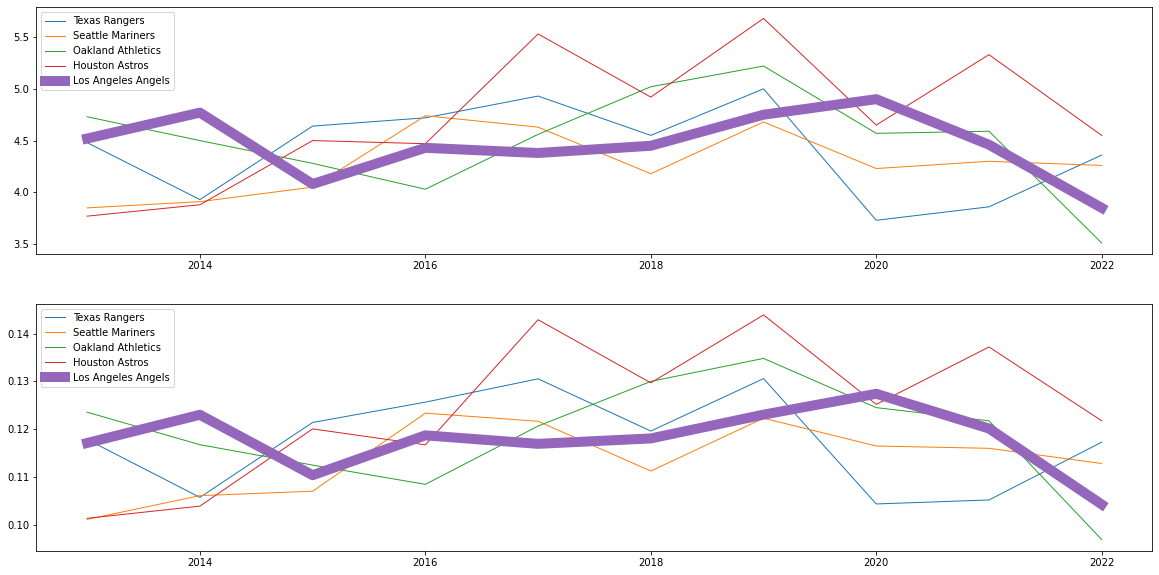

In [ ]:
# LA Angels와 같은 지구에 소속된 팀
# 'Texas Rangers', 'Seattle Mariners', 'Oakland Athletics', 'Houston Astros'

al_west_team = ['Texas Rangers', 
                'Seattle Mariners', 
                'Oakland Athletics', 
                'Houston Astros', 
                'Los Angeles Angels']

al_west_df = df_copy[df_copy['Tm'].isin(al_west_team)]

fig, axes = plt.subplots(2, 1, figsize=(20, 15))
for team in al_west_team:
    if team == 'Los Angeles Angels':
        linewidth = 10
    else:
        linewidth = 1

    axes[0].plot(al_west_df.loc[al_west_df['Tm'] == team, 'Year'], 
                 al_west_df.loc[al_west_df['Tm'] == team, 'R/G'],
                 linewidth=linewidth, label=team)

    axes[1].plot(al_west_df.loc[al_west_df['Tm'] == team, 'Year'], 
                 al_west_df.loc[al_west_df['Tm'] == team, 'R/PA'],
                 linewidth=linewidth, label=team)
    
plt.gcf().set_size_inches(20, 10)
axes[0].legend()
axes[1].legend()

plt.show()

**최종 평가**
```
- 리그 전체
15년 이후에는 리그 평균과 비슷한 수준의 득점력이었다. 
리그 전체적으로도 20년부터는 모든 팀의 득점력이 떨어지는 추세였다.
하지만, LAA는 리그 평균의 득점보다 더 큰 낙폭을 기록하고 있다.

- LA Angles와 같은 소속에 속한 팀
같은 소속 지구의 팀과는 정규 리그 우승을 두고 경쟁하기 때문에 더욱 중요하다. 
경쟁팀과 비교하면, LAA의 득점력은 대부분 하위를 기록하고 있다. 
2020년에는 득점의 양과 질에서 모두 1위였지만, 이후에는 다시 하락세로 기록하고 있다.
```

### 1.3 현재 Los Angeles Angels 문제

* 최근 2년간 리그 평균과 비교하면, 득점력이 부족하다.
* 최근 2년간 같은 지구에 속한 경쟁팀과 비교하면, 득점력이 부족하다. 정규 리그 우승을 위해서는 경쟁팀들보다 득점력이 떨어지면 안 된다.


## **🥈Session 2 Los Angeles Angels 득점력 부족 원인**  
---

> **득점력 부족 원인**

```
Los Angeles Angels의 득점력 부족은 현재의 선수단 구성에 문제가 있기 때문입니다. 

득점력 부족 문제를 해결하기 위해서 
1) 경기 중에  득점이 많이 발생하고 득점 확률이 높은 상황을 찾아냅니다.
2) 해당 상황 속에서 중요한 공격 지표를 확인해야 합니다. 

그래서 분석 내용을 바탕으로 많은 득점을 기여할 수 있는 선수를 영입해야 합니다.
```  

## **🥉Session 3 Los Angeles Angels 해결 방안**  
---

> **해결 방안 목차(Context)**
* 득점력에 영향을 미치는 중요 상황 찾기
* 해당 상황 속에서 지켜봐야 하는 중요 공격 지표 찾기

### 3.1 중요 상황 찾기

야구 경기 중에 발생할 수 있는 요소는 다양하다. 발생할 수 있는 모든 상황을 고려하기보다는 범주형 변수를 기준으로 득점력에 가장 큰 영향을 주는 중요 상황 변수를 먼저 선정한다.

* 타구 방향
* 타구가 떨어진 위치
* 타구의 세기
* 타구 종류
* 타순
* 볼 카운트
* 좌타자, 우타자
* 좌투수, 우투수
* 이닝
* Leverage
* Base
* Out

등의 상황을 큰 범주형 변수로 설정하고, 여기서 득점력에 가장 큰 영향을 미치는 변수를 찾는다.

**문제 해결을 위한 지표 선정**

앞서 득점력에 대한 지표로는 경기당 득점(R/G), 타석당 득점(R/PA)를 선정했다. 이번 MLB Project 에서는 2개의 지표를 합산한 **득점력**을 새롭게 정의해서 진행한다.



경기당 득점(R/G)의 한계는 모든 팀이 동일한 공격 기회를 가지지 않는다는 점이다. 상황에 따라서 더 적게 진행할 수도 있으며, 9회까지 승부가 나지 않으면 연장으로 이어져 더 많은 공격 기회를 가지기도 한다. 많이 발생하는 상황이라면, 빈도에 영향을 받는 지표이기도 하다. 즉, <font color=pink> **팀의 효율적인 공격 여부를 반영하지 못 한다.**

타석당 득점(R/PA)은 베이스에 주자가 많은 상황에 높겠지만, 그런 상황이 자주 나타나지 않는다. <font color=pink> **일반적으로 타석당 득점이 높은 상황은 자주 발생하지 않아서 타석당 득점만을 득점력을 나타내는 지표로 사용하기 어렵다.**

그래서 양을 나타내는 지표인 경기당 득점과 질을 나타내는 타석당 지표를 합산한 득점력을 핵심 지표로 설정한다. 경기당 득점과 타석당 득점은 스케일 차이가 있기 때문에 스케일링 과정을 거친다.

In [ ]:
from glob import glob
import pandas as pd

fpath_list = glob('/content/drive/MyDrive/MLB Project/Total Situation/*.csv')
mlb_df = pd.DataFrame()
for fpath in fpath_list:
    temp_df = pd.read_csv(fpath)
    temp_df = temp_df[temp_df['PA'] != 0]
    mlb_df = pd.concat([mlb_df, temp_df], axis=0)

mlb_df['R/PA'] = mlb_df['R'] / mlb_df['PA']
mlb_df.head()

,Date,Tm,G,PA,AB,H,1B,2B,3B,HR,...,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,R/PA
0,2021-04-01,CIN,14,42,34,10,5,3,0,2,...,0,8,1,1,1,0,0,0,0.294118,0.142857
1,2021-04-01,DET,9,35,30,5,3,1,0,1,...,0,14,0,0,0,0,1,0,0.166667,0.085714
2,2021-04-01,OAK,10,35,30,6,4,2,0,0,...,0,10,1,1,0,2,1,0,0.200000,0.028571
3,2021-04-01,PHI,11,43,36,9,7,2,0,0,...,1,13,1,1,1,0,1,0,0.250000,0.069767
4,2021-04-01,SDP,11,39,32,10,6,1,1,2,...,0,10,1,1,0,1,0,0,0.312500,0.205128


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(mlb_df[['R', 'R/PA']])

* 3개 이상의 범주형 변수 - Poly Serial
* 이진형 변수 - Point Biserial

을 이용해서 개별 변수들에 대해 pvalue를 구하고, 이를 토대로 득점력에 영향이 큰 변수들을 선별합니다.

In [ ]:
# https://github.com/eribean/RyStats/blob/main/inferential/correlation.py

import numpy as np

from scipy import stats as sp
from scipy.optimize import fminbound

def polyserial_correlation(continuous, ordinal):
    """Computes the polyserial correlation.
    
    Estimates the correlation value based on a bivariate
    normal distribution. If the ordinal input is dichotomous, 
    then the biserial correlation is returned.
    
    Args:
        continuous: Continuous Measurement
        ordinal: Ordinal Measurement
        
    Returns:
        dict: Dictionary of correlation,likelilhood ratio test (chi-squared), and p value
        
    Notes:
        User must handle missing data
    """
    # Get the number of ordinal values
    values, counts = np.unique(ordinal, return_counts=True)
    
    # Compute the thresholds (tau's)
    thresholds = sp.norm.isf(1 - counts.cumsum() / counts.sum())[:-1]
    
    # Standardize the continuous variable
    standardized_continuous = ((continuous - continuous.mean())
                               / continuous.std(ddof=1))

    def _min_func(correlation):
        denominator = np.sqrt(1 - correlation * correlation)
        k = standardized_continuous * correlation
        log_likelihood = 0
        
        for ndx, value in enumerate(values):
            mask = ordinal == value
            
            if ndx == 0:
                numerator = thresholds[ndx] - k[mask]
                probabilty = sp.norm.cdf(numerator / denominator)
                
            elif ndx == (values.size -1):
                numerator = thresholds[ndx-1] - k[mask]
                probabilty = (1 - sp.norm.cdf(numerator / denominator))
                
            else:
                numerator1 = thresholds[ndx] - k[mask]
                numerator2 = thresholds[ndx-1] - k[mask]
                probabilty = (sp.norm.cdf(numerator1 / denominator)
                              - sp.norm.cdf(numerator2 / denominator))
        
            log_likelihood -= np.log(probabilty).sum()
        
        return log_likelihood
        
    rho = fminbound(_min_func, -.99, .99)

    # Likelihood ratio test
    log_likelihood_rho = _min_func(rho)
    log_likelihood_zero = _min_func(0.0)
    likelihood_ratio = -2 * (log_likelihood_rho - log_likelihood_zero)
    p_value = sp.chi2.sf(likelihood_ratio, 1)
    
    return {
        'Correlation': rho,
        'Likelihood Ratio': likelihood_ratio,
        'p-value': p_value
    }

In [ ]:
multi_situations = [
    'BattedBallsDirection',
    'BattedBallsField',
    'BattedBallsPower',
    'BattedBallsType',
    'BattingOrder',
    'Count',
    'Inning',
    'Leverage',
    'SituationBases',
    'SituationOut']

biniary_situations = [
    'HandnessHitter',
    'HandnessPitcher',
    'HomeAway']

In [ ]:
# multi_situations
import re

multi_pvals = []

for situation in multi_situations:
    print(situation)
    df = pd.DataFrame()

    file_format = '/content/drive/MyDrive/MLB Project/Total Situation/Splits Leaderboard Data_{}_*.csv'.format(situation)
    file_paths = glob(file_format)

    for fpath in file_paths:
        temp_df = pd.read_csv(fpath)
        temp_df = temp_df[temp_df['PA'] != 0]
        temp_df['R/PA'] = temp_df['R'] / temp_df['PA']

        result = scaler.transform(temp_df[['R', 'R/PA']])
        temp_df['Target'] = result[:, 0] + result[:, 1]

        temp_df[situation] = re.findall('\_([ 0-9a-zA-Z-]+)\.csv', fpath)[0]
        
        df = pd.concat([df, temp_df[[situation, 'Target']]], axis=0)

    pval = polyserial_correlation(df['Target'], df[situation])['p-value']
    multi_pvals.append(pval)

BattedBallsDirection
BattedBallsField
BattedBallsPower
BattedBallsType


<ipython-input-10-633ca736f56e>:57: RuntimeWarning: divide by zero encountered in log
  log_likelihood -= np.log(probabilty).sum()


BattingOrder
Count
Inning
Leverage
SituationBases
SituationOut


In [ ]:
from scipy.stats import pointbiserialr

binary_situations = [
    'HandnessHitter',
    'HandnessPitcher',
    'HomeAway']

binary_pvals = []

for situation in binary_situations:
    print(situation)
    df = pd.DataFrame()

    file_format = '/content/drive/MyDrive/MLB Project/Total Situation/Splits Leaderboard Data_{}_*.csv'.format(situation)
    file_paths = glob(file_format)

    for idx, fpath in enumerate(file_paths):
        temp_df = pd.read_csv(fpath)
        temp_df = temp_df[temp_df['PA'] != 0]
        temp_df['R/PA'] = temp_df['R'] / temp_df['PA']

        result = scaler.transform(temp_df[['R', 'R/PA']])
        temp_df['Target'] = result[:, 0] + result[:, 1]

        temp_df[situation] = idx
        
        df = pd.concat([df, temp_df[[situation, 'Target']]], axis=0)

    pval = pointbiserialr(df[situation], df['Target'])[1]
    binary_pvals.append(pval)

HandnessHitter
HandnessPitcher
HomeAway


In [ ]:
multi_pvals_series = pd.Series(multi_pvals, index=multi_situations)
binary_pvals_series = pd.Series(binary_pvals, index=binary_situations)
pvals_series = pd.concat([binary_pvals_series, multi_pvals_series])
pvals_series.sort_values(ascending=True, inplace=True)
pvals_series

BattedBallsPower         0.000000e+00
BattedBallsType          0.000000e+00
SituationBases           0.000000e+00
Count                   2.643624e-281
HandnessPitcher         6.887161e-198
BattedBallsDirection    1.488624e-177
BattingOrder            4.887689e-160
SituationOut            3.722443e-148
Leverage                1.449104e-104
HandnessHitter           5.757891e-70
BattedBallsField         1.386769e-05
Inning                   5.687673e-03
HomeAway                 1.477907e-02
dtype: float64

pvalue를 토대로 득점력에 영향을 가장 많이 미치는 상위 5가지 변수를 선택한다.
* BattedBallsPower
* BattedBallsType
* SituationBases
* Count
* HandnessPitcher

단, Count는 발생할 수 있는 경우가 10가지가 넘기 때문에 추가적으로 그룹화를 진행해서 변수를 줄인다.

In [ ]:
df = pd.DataFrame()
fpath_list = glob('/content/drive/MyDrive/MLB Project/Count/*.csv')
for fpath in fpath_list:
    temp_df = pd.read_csv(fpath)
    
    temp_df['R/G'] = temp_df['R'] / temp_df['G']
    temp_df['R/PA'] = temp_df['R'] / temp_df['PA']
    count = re.findall(' ([0-9-]+)\.csv', fpath)[0]
    temp_df['Count'] = count
    
    df = pd.concat([df, temp_df], axis=0)

count_df = df.groupby(['Count'], as_index=False)[['R/G', 'R/PA']].mean()
count_df

,Count,R/G,R/PA
0,0-1,0.055583,0.026647
1,0-2,0.025725,0.018596
2,1-0,0.062817,0.034597
3,1-1,0.052823,0.029118
4,1-2,0.032135,0.020621
5,2-0,0.041596,0.033049
6,2-1,0.042968,0.030699
7,2-2,0.032824,0.022427
8,3-0,0.020849,0.019130
9,3-1,0.032018,0.027401


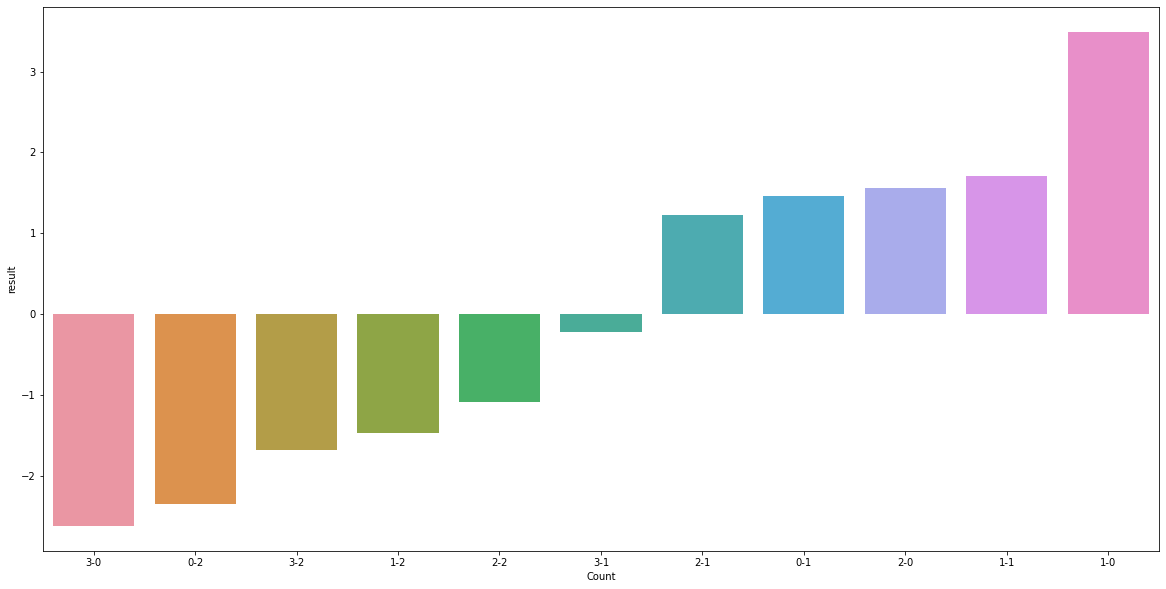

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

count_scaler = StandardScaler().fit(count_df[['R/G', 'R/PA']])
result = count_scaler.transform(count_df[['R/G', 'R/PA']])
count_df['result'] = result[:, 0] + result[:, 1]

sns.barplot(data=count_df.sort_values(by=['result']), x='Count', y='result')
plt.gcf().set_size_inches(20, 10)
plt.show()

Count는 위의 결과를 토대로 
* 3-0, 0-2, 3-2, 1-2, 2-2, 3-1. result (-)
* 2-1, 0-1, 2-0, 1-1, 1-0. result (+)

크게 2가지의 상황으로 구분 짓는다.

최종적으로 선택한 5가지 상황에서 발생할 수 있는 모든 경우의 수를 토대로 득점력에 가장 큰 영향을 미치는 가려낸다.

In [ ]:
import pprint

situation_dict = {
    0: ['Hard', 'Medium'], # 'BattedBallsPower'
    1: ['Flyballs' ,'Groundballs', 'Line Drives'], # 'BattedBallsType'
    2: ['Loaded', 'Runners On', 'Runners in Scoring'], # 'SituationBases'
    3: ['result(-)', 'result(+)'], # 'Count'
    4: ['vs LHP,', 'vs RHP'] # 'HandnessPitcher'
    }

all_situation = []
situation_list = [0] * len(situation_dict)

def get_all_situations(situation_dict, idx):
    if(idx == 5):
        all_situation.append(situation_list.copy())
    else:
        for situation in situation_dict[idx]:
            situation_list[idx] = situation
            get_all_situations(situation_dict, idx+1)

get_all_situations(situation_dict, 0)
for idx, situation in enumerate(all_situation, 1):
    print(idx, situation)

1 ['Hard', 'Flyballs', 'Loaded', 'result(-)', 'vs LHP,']
2 ['Hard', 'Flyballs', 'Loaded', 'result(-)', 'vs RHP']
3 ['Hard', 'Flyballs', 'Loaded', 'result(+)', 'vs LHP,']
4 ['Hard', 'Flyballs', 'Loaded', 'result(+)', 'vs RHP']
5 ['Hard', 'Flyballs', 'Runners On', 'result(-)', 'vs LHP,']
6 ['Hard', 'Flyballs', 'Runners On', 'result(-)', 'vs RHP']
7 ['Hard', 'Flyballs', 'Runners On', 'result(+)', 'vs LHP,']
8 ['Hard', 'Flyballs', 'Runners On', 'result(+)', 'vs RHP']
9 ['Hard', 'Flyballs', 'Runners in Scoring', 'result(-)', 'vs LHP,']
10 ['Hard', 'Flyballs', 'Runners in Scoring', 'result(-)', 'vs RHP']
11 ['Hard', 'Flyballs', 'Runners in Scoring', 'result(+)', 'vs LHP,']
12 ['Hard', 'Flyballs', 'Runners in Scoring', 'result(+)', 'vs RHP']
13 ['Hard', 'Groundballs', 'Loaded', 'result(-)', 'vs LHP,']
14 ['Hard', 'Groundballs', 'Loaded', 'result(-)', 'vs RHP']
15 ['Hard', 'Groundballs', 'Loaded', 'result(+)', 'vs LHP,']
16 ['Hard', 'Groundballs', 'Loaded', 'result(+)', 'vs RHP']
17 ['Hard', '

In [ ]:
# situation Top N 을 추출
situation_df = pd.DataFrame()

situation_fpath_list = glob('/content/drive/MyDrive/MLB Project/Situation Top N/Splits Leaderboard Data *.csv')
for fpath in situation_fpath_list:
    situation = re.findall('.*Splits Leaderboard Data ([ 0-9a-zA-Z-]+)\.csv', fpath)[0]
    
    temp_df = pd.read_csv(fpath)
    temp_df = temp_df[temp_df['PA'] != 0]
    temp_df['R/PA'] = temp_df['R'] / temp_df['PA']
    temp_df['situation'] = situation

    temp_df = temp_df.groupby(['situation'], as_index=False)[['R', 'R/PA']].mean()
    situation_df = pd.concat([situation_df, temp_df], axis=0)

situation_df.head()

,situation,R,R/PA
0,Through 3-0 Through 0-2 Through 3-2 Through 1-...,0.357664,0.323601
0,Through 3-0 Through 0-2 Through 3-2 Through 1-...,0.413284,0.303506
0,Through 3-0 Through 0-2 Through 3-2 Through 1-...,0.000000,0.000000
0,Through 3-0 Through 0-2 Through 3-2 Through 1-...,0.002967,0.002967
0,Through 3-0 Through 0-2 Through 3-2 Through 1-...,1.451078,0.354012


In [ ]:
situation_scaler = StandardScaler().fit(situation_df[['R', 'R/PA']])
result = situation_scaler.transform(situation_df[['R', 'R/PA']])
situation_df['result'] = result[:, 0] + result[:, 1]
situation_df.sort_values(by=['result'], ascending=False, inplace=True)
situation_df.reset_index(drop=True, inplace=True)
situation_df.head()

,situation,R,R/PA,result
0,Through 2-1 Through 0-1 Through 2-0 Through 1-...,7.630159,0.338596,8.554396
1,Through 2-1 Through 0-1 Through 2-0 Through 1-...,4.187599,0.335199,5.552563
2,Through 3-0 Through 0-2 Through 3-2 Through 1-...,3.468254,0.326047,4.856263
3,Through 2-1 Through 0-1 Through 2-0 Through 1-...,2.971292,0.347372,4.601358
4,Through 3-0 Through 0-2 Through 3-2 Through 1-...,1.951846,0.322183,3.514622


In [ ]:
k = 3
top3_list = situation_df['situation'].iloc[:3].tolist()
for rank, situation in enumerate(top3_list, 1):
    print(rank, situation, sep=' / ')

1 / Through 2-1 Through 0-1 Through 2-0 Through 1-1 Through 1-0 Flyballs Runners On Hard vs RHP
2 / Through 2-1 Through 0-1 Through 2-0 Through 1-1 Through 1-0 Flyballs Runners in Scoring Hard vs RHP
3 / Through 3-0 Through 0-2 Through 3-2 Through 1-2 Through 2-2 Through 3-1 Flyballs Runners On Hard vs RHP


> **중요 상황 Top 3**

```
1. Count(Through 2-1 Through 0-1 Through 2-0 Through 1-1 Through 1-0) Flyballs(뜬 공) Runners On(주자가 베이스에 있는 경우) Hard(강한 타구) vs RHP(우타자 상대)
2. Count(Through 2-1 Through 0-1 Through 2-0 Through 1-1 Through 1-0) Flyballs(뜬 공) Runners in Scoring(득점권에 주자가 있는 상황) Hard(강한 타구) vs RHP(우타자 상대)
3. Count(Through 3-0 Through 0-2 Through 3-2 Through 1-2 Through 2-2 Through 3-1) Flyballs(뜬 공) Runners On(주자가 베이스에 있는 경우) Hard(강한 타구) vs RHP(우타자 상대)
```

### 3.2 중요 공격 지표 찾기

#### 3.2.1 상황 1

In [ ]:
import pandas as pd
import numpy as np
from glob import glob

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
pd.set_option('display.max_columns', None)

##### 필수 전처리

In [ ]:
# 데이터 통합
fpath_list = glob('/content/drive/MyDrive/MLB Project/Situation Top 3/Splits Leaderboard Data Through 2-1 Through 0-1 Through 2-0 Through 1-1 Through 1-0 Flyballs Runners On Hard vs RHP*.csv')
df = pd.read_csv(fpath_list[0])

for fpath in fpath_list[1:]:
    temp_df = pd.read_csv(fpath)
    if 'AVG' in temp_df.columns:
        drop_list = ['Date', 'Tm', 'PA', 'AVG']
    else:
        drop_list = ['Date', 'Tm', 'PA']

    df = pd.concat([df, temp_df.drop(drop_list, axis=1)], axis=1)

df = df[df['PA'] != 0]
df['R/PA'] = df['R'] / df['PA']
df.rename({'R':'R/G'}, axis=1, inplace=True)

df.reset_index(drop=True, inplace=True)
df.head()

,Date,Tm,G,PA,AB,H,1B,2B,3B,HR,R/G,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP,wRC,wRAA,wOBA,wRC+,GB/FB,LD%,GB%,FB%,IFFB%,HR/FB,IFH%,BUH%,Pull%,Cent%,Oppo%,Soft%,Med%,Hard%,R/PA
0,2019-03-20,SEA,2,2,2,2,0,0,0,2,2,6,0,0,0,0,0,0,0,0,0,1.000000,0,0,0,1.000000,4.0,5.000000,3.000000,0.0,3.051635,2.800000,1.939536,1198.183906,0,0,0,1,0,1.000000,0,0,0.500000,0.000000,0.5,0,0,1,1.000000
1,2019-03-20,OAK,1,1,1,1,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,1.000000,0,0,0,1.000000,4.0,5.000000,3.000000,0.0,1.525818,1.400000,1.939536,1197.446920,0,0,0,1,0,1.000000,0,0,0.000000,0.000000,1.0,0,0,1,1.000000
2,2019-03-21,SEA,2,3,3,2,0,1,0,1,1,2,0,0,0,0,0,0,0,0,0,0.666667,0,0,0,0.666667,2.0,2.666667,1.333333,0.5,2.276037,1.898584,1.052067,597.964662,0,0,0,1,0,0.333333,0,0,0.333333,0.666667,0.0,0,0,1,0.333333
3,2019-03-28,SDP,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0.000000,0.0,0.000000,0.000000,0.0,-0.150740,-0.276557,0.000000,-100.000000,0,0,0,1,0,0.000000,0,0,0.000000,1.000000,0.0,0,0,1,0.000000
4,2019-03-28,ATL,1,1,1,1,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,1.000000,0,0,0,1.000000,4.0,5.000000,3.000000,0.0,1.525818,1.400000,1.939536,1154.503253,0,0,0,1,0,1.000000,0,0,1.000000,0.000000,0.0,0,0,1,1.000000


In [ ]:
# 필요 없는 특징 제거

# 하나의 값만을 가지는 특징은 변수 역할을 하지 못 한다.
# 일반화된 모델을 만드는데 도움이 되지 않기 때문에 해당 컬럼은 제거한다.
unique_data_cols = [col for col in df.columns if df[col].nunique() == 1]
print(unique_data_cols)

['BB', 'IBB', 'SO', 'HBP', 'SH', 'GDP', 'SB', 'CS', 'BB%', 'K%', 'BB/K', 'GB/FB', 'LD%', 'GB%', 'FB%', 'IFFB%', 'IFH%', 'BUH%', 'Soft%', 'Med%', 'Hard%']


In [ ]:
# 이외에도 모델을 훈련하는데 도움이 되지 않는 컬럼은 제거한다.
drop_list = ['Date', 'G', 'AB', 'H', 'RBI', 'OPS'] + unique_data_cols
df.drop(drop_list, axis=1, inplace=True)

In [ ]:
df.head()

,Tm,PA,1B,2B,3B,HR,R/G,SF,AVG,OBP,SLG,ISO,BABIP,wRC,wRAA,wOBA,wRC+,HR/FB,Pull%,Cent%,Oppo%,R/PA
0,SEA,2,0,0,0,2,2,0,1.000000,1.000000,4.0,3.000000,0.0,3.051635,2.800000,1.939536,1198.183906,1.000000,0.500000,0.000000,0.5,1.000000
1,OAK,1,0,0,0,1,1,0,1.000000,1.000000,4.0,3.000000,0.0,1.525818,1.400000,1.939536,1197.446920,1.000000,0.000000,0.000000,1.0,1.000000
2,SEA,3,0,1,0,1,1,0,0.666667,0.666667,2.0,1.333333,0.5,2.276037,1.898584,1.052067,597.964662,0.333333,0.333333,0.666667,0.0,0.333333
3,SDP,1,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0.0,-0.150740,-0.276557,0.000000,-100.000000,0.000000,0.000000,1.000000,0.0,0.000000
4,ATL,1,0,0,0,1,1,0,1.000000,1.000000,4.0,3.000000,0.0,1.525818,1.400000,1.939536,1154.503253,1.000000,1.000000,0.000000,0.0,1.000000


In [ ]:
# 결측치 확인
df.isnull().sum()

Tm       0
PA       0
1B       0
2B       0
3B       0
HR       0
R/G      0
SF       0
AVG      0
OBP      0
SLG      0
ISO      0
BABIP    0
wRC      0
wRAA     0
wOBA     0
wRC+     0
HR/FB    0
Pull%    0
Cent%    0
Oppo%    0
R/PA     0
dtype: int64

In [ ]:
# 득점력 지표 생성하기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df[['R/G', 'R/PA']])
result = scaler.transform(df[['R/G', 'R/PA']])
df['target'] = result[:, 0] + result[:, 1]

In [ ]:
df.head()

,Tm,PA,1B,2B,3B,HR,R/G,SF,AVG,OBP,SLG,ISO,BABIP,wRC,wRAA,wOBA,wRC+,HR/FB,Pull%,Cent%,Oppo%,R/PA,target
0,SEA,2,0,0,0,2,2,0,1.000000,1.000000,4.0,3.000000,0.0,3.051635,2.800000,1.939536,1198.183906,1.000000,0.500000,0.000000,0.5,1.000000,3.736930
1,OAK,1,0,0,0,1,1,0,1.000000,1.000000,4.0,3.000000,0.0,1.525818,1.400000,1.939536,1197.446920,1.000000,0.000000,0.000000,1.0,1.000000,2.243022
2,SEA,3,0,1,0,1,1,0,0.666667,0.666667,2.0,1.333333,0.5,2.276037,1.898584,1.052067,597.964662,0.333333,0.333333,0.666667,0.0,0.333333,0.651678
3,SDP,1,0,0,0,0,0,0,0.000000,0.000000,0.0,0.000000,0.0,-0.150740,-0.276557,0.000000,-100.000000,0.000000,0.000000,1.000000,0.0,0.000000,-1.637902
4,ATL,1,0,0,0,1,1,0,1.000000,1.000000,4.0,3.000000,0.0,1.525818,1.400000,1.939536,1154.503253,1.000000,1.000000,0.000000,0.0,1.000000,2.243022


In [ ]:
# 변수 탐색(연속형 / 범주형 변수 구분)
for col in df.columns:
    print(col, df[col].dtypes, df[col].nunique(), df[col].unique()[:5], sep=' / ')

Tm / object / 30 / ['SEA' 'OAK' 'SDP' 'ATL' 'LAA']
PA / int64 / 7 / [2 1 3 5 4]
1B / int64 / 3 / [0 1 2]
2B / int64 / 5 / [0 1 2 4 3]
3B / int64 / 3 / [0 1 2]
HR / int64 / 5 / [2 1 0 3 4]
R/G / int64 / 5 / [2 1 0 3 4]
SF / int64 / 4 / [0 1 2 3]
AVG / float64 / 14 / [1.         0.66666667 0.         0.5        0.6       ]
OBP / float64 / 13 / [1.         0.66666667 0.         0.33333333 0.5       ]
SLG / float64 / 37 / [4. 2. 0. 3. 1.]
ISO / float64 / 35 / [3.         1.33333333 0.         1.5        2.        ]
BABIP / float64 / 11 / [0.         0.5        1.         0.33333333 0.66666667]
wRC / float64 / 297 / [ 3.05163536  1.52581768  2.27603693 -0.15073964 -0.30147928]
wRAA / float64 / 299 / [ 2.8000001   1.40000005  1.89858405 -0.27655727 -0.55311454]
wOBA / float64 / 214 / [1.93953609 1.05206676 0.         0.64651203 0.96976805]
wRC+ / float64 / 1621 / [1198.18390568 1197.44691992  597.96466235 -100.         1154.50325298]
HR/FB / float64 / 12 / [1.         0.33333333 0.         0

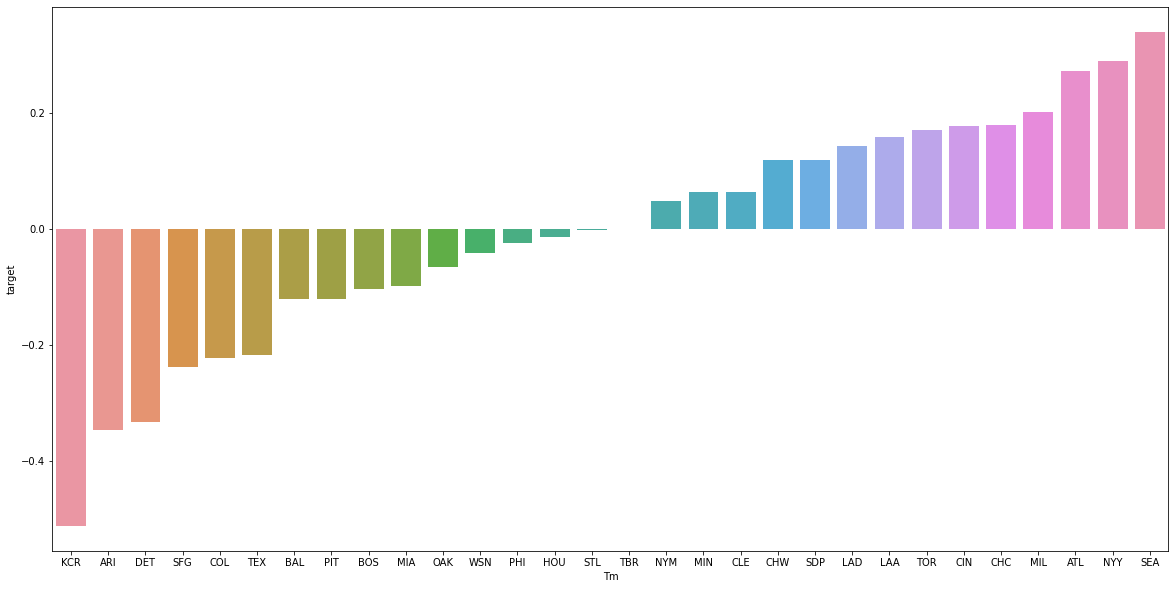

In [ ]:
# 범주형 변수 탐색. Team
cate_result = df.groupby(['Tm'], as_index=False)['target'].mean()
cate_result.sort_values(by=['target'], inplace=True)
sns.barplot(data=cate_result, x='Tm', y='target')

plt.gcf().set_size_inches(20, 10)
plt.show()

In [ ]:
# 정의한 득점력을 토대로 등급을 구분한다.
# 'S': ['ATL', 'NYY', 'SEA']
# 'A': ['CHW', 'SDP', 'LAD', 'LAA', 'TOR', 'CIN', 'CHC', 'MIL']
# 'B': ['NYM', 'MIN', 'CLE'],
# 'C': ['OAK', 'WSN', 'PHI', 'HOU', 'STL', 'TBR'],
# 'D': ['BAL', 'PIT', 'BOS', 'MIA'],
# 'E': ['SFG', 'COL', 'TEX'],
# 'F': ['ARI', 'DET'],
# 'G': ['KCR']

def set_grade(team):
    if team in ['ATL', 'NYY', 'SEA']:
        return "S"
    elif team in ['CHW', 'SDP', 'LAD', 'LAA', 'TOR', 'CIN', 'CHC', 'MIL']:
        return "A"
    elif team in ['NYM', 'MIN', 'CLE']:
        return "B"
    elif team in ['OAK', 'WSN', 'PHI', 'HOU', 'STL', 'TBR']:
        return "C"
    elif team in ['BAL', 'PIT', 'BOS', 'MIA']:
        return "D"
    elif team in ['SFG', 'COL', 'TEX']:
        return "E"
    elif team in ['ARI', 'DET']:
        return "F"
    else:
        return "G"

df['grade'] = df['Tm'].apply(set_grade)
df.drop(['Tm'], axis=1, inplace=True)

In [ ]:
# 연속형 변수 탐색
# 'AVG', 'OBP', 'SLG', 'ISO', 'BABIP', 'wRC', 'wRAA', 'wOBA', 'wRC+',	'HR/FB', 'Pull%', 'Cent%', 'Oppo%'
temp_cont_vars = ['AVG', 'OBP', 'SLG', 'ISO', 'BABIP', 'wRC', 'wRAA', 'wOBA', 'wRC+',	'HR/FB', 'Pull%', 'Cent%', 'Oppo%']
df[temp_cont_vars].describe()

,AVG,OBP,SLG,ISO,BABIP,wRC,wRAA,wOBA,wRC+,HR/FB,Pull%,Cent%,Oppo%
count,8814.000000,8814.000000,8814.000000,8814.000000,8814.000000,8814.000000,8814.000000,8814.000000,8814.000000,8814.000000,8814.000000,8814.000000,8814.000000
mean,0.513250,0.502555,1.737257,1.224007,0.182568,0.946954,0.753783,0.887147,490.571412,0.344845,0.341602,0.448871,0.209527
std,0.444726,0.440010,1.619406,1.216263,0.356109,1.094975,1.050273,0.809174,540.075534,0.418957,0.416943,0.437598,0.356964
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.753698,-1.382786,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.139094,-0.260150,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,2.000000,1.000000,0.000000,0.900959,0.775141,0.969768,530.388727,0.000000,0.000000,0.500000,0.000000
75%,1.000000,1.000000,4.000000,3.000000,0.000000,1.521056,1.400000,1.751561,1061.031234,0.666667,0.666667,1.000000,0.333333
max,1.000000,1.000000,4.000000,3.000000,1.000000,7.004230,6.375141,2.072001,1350.950631,1.000000,1.000000,1.000000,1.000000


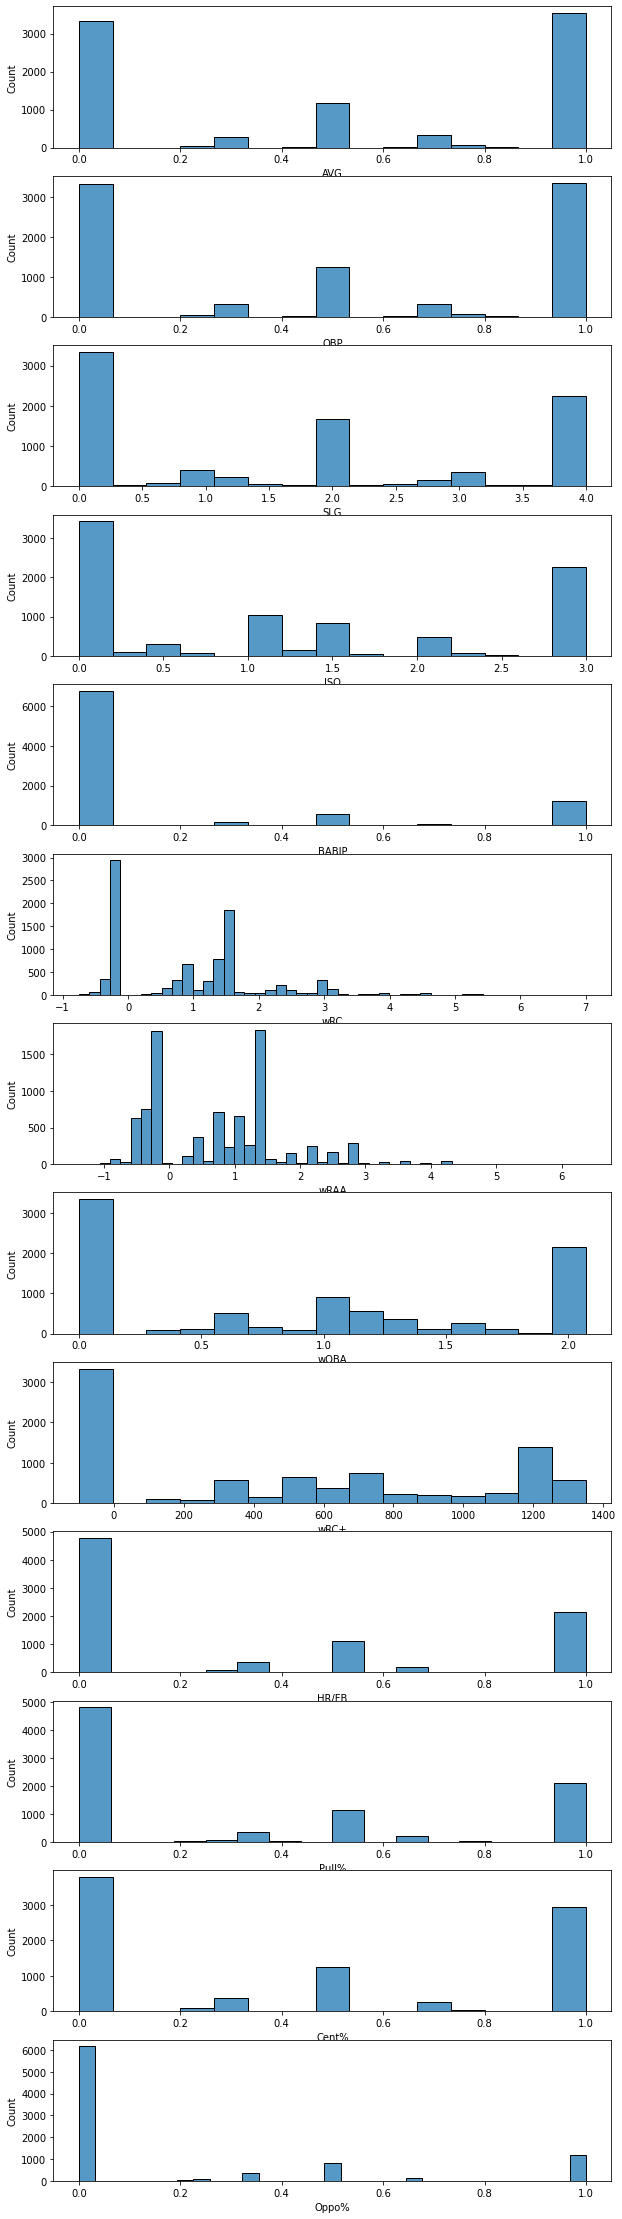

In [ ]:
# 연속형 변수에 대한 탐색
num_vars = len(temp_cont_vars)
fig, axes = plt.subplots(num_vars, 1, figsize=(10, 40))

for idx, col in enumerate(temp_cont_vars):
    sns.histplot(df[col], ax=axes[idx])

plt.show()

In [ ]:
# Train / Test Split
from sklearn.model_selection import train_test_split

X = df.drop(['R/G', 'R/PA', 'target'], axis=1)
Y = df['target']

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, test_size=0.2)

print(Train_X.shape)
print(Test_X.shape)
print(Train_Y.shape)
print(Test_Y.shape)

(7051, 20)
(1763, 20)
(7051,)
(1763,)


In [ ]:
# Train 데이터 샘플 수 대비 Train 데이터 특징이 많기 때문에 특징이 늘어나는 것에 대한 부담은 덜하다.
# 그래서 더미화를 진행한다.
from feature_engine.categorical_encoders import OneHotCategoricalEncoder as OHE

dummy_model = OHE(variables = ['grade'], drop_last = False).fit(Train_X)
Train_X = dummy_model.transform(Train_X)
Test_X = dummy_model.transform(Test_X)

In [ ]:
Train_X.head()

,PA,1B,2B,3B,HR,SF,AVG,OBP,SLG,ISO,BABIP,wRC,wRAA,wOBA,wRC+,HR/FB,Pull%,Cent%,Oppo%,grade_E,grade_S,grade_C,grade_A,grade_D,grade_F,grade_B,grade_G
7215,1,0,0,0,1,0,1.0,1.0,4.0,3.0,0.0,1.514346,1.400000,2.072001,1345.685582,1.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0
8279,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,-0.131727,-0.246073,0.000000,-100.000000,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0
8091,2,0,1,0,1,0,1.0,1.0,3.0,2.0,1.0,2.384783,2.156090,1.666739,1024.543047,0.5,0.5,0.0,0.5,0,1,0,0,0,0,0,0
2275,1,0,1,0,0,0,1.0,1.0,2.0,1.0,1.0,0.900959,0.775141,1.216664,687.172520,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,0
8525,2,0,0,0,1,0,0.5,0.5,2.0,1.5,0.0,1.382620,1.153927,1.036001,601.323622,0.5,0.0,0.5,0.5,0,0,1,0,0,0,0,0


##### 성능 향상 전처리

In [ ]:
# 성능 향상 전처리
# 1. 이상치 확인
# 2. 왜도 확인
# 3. 스케일링

In [ ]:
# 이상치 확인
# DBSCAN을 통해서 이상치를 제거한다.
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN

dist_mat = cdist(Train_X, Train_X)
dist_mat

array([[0.00000000e+00, 1.44570035e+03, 3.21156926e+02, ...,
        1.44570040e+03, 1.84913583e+02, 1.44569972e+03],
       [1.44570035e+03, 0.00000000e+00, 1.12455844e+03, ...,
        2.00018018e+00, 1.26079420e+03, 2.00032266e+00],
       [3.21156926e+02, 1.12455844e+03, 0.00000000e+00, ...,
        1.12455986e+03, 1.36267926e+02, 1.12455944e+03],
       ...,
       [1.44570040e+03, 2.00018018e+00, 1.12455986e+03, ...,
        0.00000000e+00, 1.26079425e+03, 1.41424435e+00],
       [1.84913583e+02, 1.26079420e+03, 1.36267926e+02, ...,
        1.26079425e+03, 0.00000000e+00, 1.26079347e+03],
       [1.44569972e+03, 2.00032266e+00, 1.12455944e+03, ...,
        1.41424435e+00, 1.26079347e+03, 0.00000000e+00]])

In [ ]:
eps = np.quantile(dist_mat, 0.1)
cluster = DBSCAN(eps=eps, min_samples=3).fit(Train_X)
num_outlier_cond = (len(Train_X) - len(Train_X[cluster.labels_ != -1])) / len(Train_X)
num_outlier_cond

0.06736633101687704

In [ ]:
not_outlier_cond = cluster.labels_ != -1
Train_X = Train_X[not_outlier_cond]
Train_Y = Train_Y[not_outlier_cond]

In [ ]:
Train_X.shape[0] == Train_Y.shape[0]

True

In [ ]:
# 2. 왜도 확인
Train_X[temp_cont_vars].skew()

AVG      0.027055
OBP      0.061654
SLG      0.309601
ISO      0.459982
BABIP    1.849780
wRC      0.634664
wRAA     0.540368
wOBA     0.239228
wRC+     0.252900
HR/FB    0.663085
Pull%    0.680416
Cent%    0.201505
Oppo%    1.398659
dtype: float64

In [ ]:
biased_vars = ['BABIP']

# np.sqrt(x - x.min() + 1)
sqrt_skew = np.sqrt(Train_X[biased_vars] - Train_X[biased_vars].min() + 1).skew()

# np.log(x - x.min() + 1)
log_skew = np.log(Train_X[biased_vars] - Train_X[biased_vars].min() + 1).skew()

print("sqrt_skew", sqrt_skew)
print("log_skew", log_skew)

sqrt_skew BABIP    1.803349
dtype: float64
log_skew BABIP    1.759012
dtype: float64


In [ ]:
# np.sqrt, np.log를 진행해서 왜도를 줄이려고 했지만, 왜도에 큰 변화가 없어서 그대로 진행한다.

In [ ]:
# 3. 스케일링
Train_X[temp_cont_vars].max() - Train_X[temp_cont_vars].min()

AVG         1.000000
OBP         1.000000
SLG         4.000000
ISO         3.000000
BABIP       1.000000
wRC         6.986298
wRAA        6.862612
wOBA        2.072001
wRC+     1450.950631
HR/FB       1.000000
Pull%       1.000000
Cent%       1.000000
Oppo%       1.000000
dtype: float64

In [ ]:
# wRC+ 와 나머지 변수들 사이에 스케일 차이가 크다.
# 득점력에 다른 특징들이 미치는 영향을 동일하게 맞추기 위해서 스케일링을 진행한다.
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(Train_X[temp_cont_vars])
Train_X[temp_cont_vars] = min_max_scaler.transform(Train_X[temp_cont_vars])
Train_X[temp_cont_vars].max() - Train_X[temp_cont_vars].min()

AVG      1.0
OBP      1.0
SLG      1.0
ISO      1.0
BABIP    1.0
wRC      1.0
wRAA     1.0
wOBA     1.0
wRC+     1.0
HR/FB    1.0
Pull%    1.0
Cent%    1.0
Oppo%    1.0
dtype: float64

In [ ]:
Test_X[temp_cont_vars] = min_max_scaler.transform(Test_X[temp_cont_vars])
Test_X[temp_cont_vars].max() - Test_X[temp_cont_vars].min()

AVG      1.000000
OBP      1.000000
SLG      1.000000
ISO      1.000000
BABIP    1.000000
wRC      0.937276
wRAA     0.939304
wOBA     1.000000
wRC+     1.000000
HR/FB    1.000000
Pull%    1.000000
Cent%    1.000000
Oppo%    1.000000
dtype: float64

In [ ]:
Train_X.head()

,PA,1B,2B,3B,HR,SF,AVG,OBP,SLG,ISO,BABIP,wRC,wRAA,wOBA,wRC+,HR/FB,Pull%,Cent%,Oppo%,grade_E,grade_S,grade_C,grade_A,grade_D,grade_F,grade_B,grade_G
7215,1,0,0,0,1,0,1.0,1.0,1.00,1.000000,0.0,0.324642,0.405500,1.000000,0.996371,1.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0
8279,1,0,0,0,0,0,0.0,0.0,0.00,0.000000,0.0,0.089027,0.165639,0.000000,0.000000,0.0,0.0,0.0,1.0,0,1,0,0,0,0,0,0
8091,2,0,1,0,1,0,1.0,1.0,0.75,0.666667,1.0,0.449234,0.515675,0.804410,0.775039,0.5,0.5,0.0,0.5,0,1,0,0,0,0,0,0
2275,1,0,1,0,0,0,1.0,1.0,0.50,0.333333,1.0,0.236843,0.314447,0.587193,0.542522,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,0
8525,2,0,0,0,1,0,0.5,0.5,0.50,0.500000,0.0,0.305787,0.369642,0.500000,0.483355,0.5,0.0,0.5,0.5,0,0,1,0,0,0,0,0


##### 모델 및 특징 선택

In [ ]:
# 모델 목록 정의
Train_X.shape

(6576, 27)

> **모델 선택**

```
이진형 변수(8개), 연속형 변수(19개). 단일 종류 데이터가 아니라 섞여있다.

* 특징에 비해 샘플의 개수가 엄청나게 많은 편이 아니라 SVM 같은 매우 복잡한 모델은 사용하기 어렵다.
* 적당한 복잡성을 가진 Tree 계열의 앙상블 모델(RandomForest Regressor, LightGBM, XGBoost)은 특징간 상관성, 이상치, 스케일의 영향을 받지 않기 때문에 가능하다.
* 단순한 회귀 모델인 KNN, Linear Regressor의 경우에는 데이터의 Type이 단일 종류가 아닌 연속, 이진이 섞여있어 배제한다.

그래서 Model로는 Tree 계열의 앙상블 모델을 선택한다.
```  

In [ ]:
# 앙상블 계열의 모델 (Random Forest Regressor, LightGBM, XGBoost)
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGB
from lightgbm import LGBMRegressor as LGB
from sklearn.feature_selection import *

In [ ]:
param_grid = {}
grid_rfr = ParameterGrid(
    {"max_depth": [2, 3, 4],
     "n_estimators":[100, 200]})

grid_lgb = ParameterGrid(
    {"max_depth":[3, 4, 5],
     "n_estimators": [100, 200],
     "learning_rate": [0.05, 0.1, 0.2]})

grid_xgb = ParameterGrid(
    {"max_depth":[3, 4, 5],
     "n_estimators": [100, 200],
     "learning_rate": [0.05, 0.1, 0.2]})

param_grid[RFR] = grid_rfr
param_grid[LGB] = grid_lgb
param_grid[XGB] = grid_xgb

##### 모델 학습

In [ ]:
max_iter_num = 0
for k in range(27, 2, -3):
    for model in param_grid.keys():
        for params in param_grid[model]:
            max_iter_num += 1

print(max_iter_num)

378


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# model의 성능을 평가하는 지표로는 Mean Absolute Error를 사용한다.
from sklearn.metrics import mean_absolute_error as MAE

cur_iter = 1
best_score = 9999999999999

for k in range(27, 2, -3):
    selector = SelectKBest(mutual_info_regression, k=k).fit(Train_X, Train_Y)
    selected_Train_X = selector.transform(Train_X)
    selected_Test_X = selector.transform(Test_X)
    selected_features = Train_X.columns[selector.get_support()]

    for model_func in param_grid.keys():
        for params in param_grid[model_func]:
            model = model_func(**params).fit(selected_Train_X, Train_Y)
            pred_Y = model.predict(selected_Test_X)
            score = MAE(Test_Y, pred_Y)

            if score < best_score:
                best_score = score
                best_params = params
                best_model = model
                best_features = selected_features
                
            print("{}/{}, best_socre: {}, best_model: {}".format(cur_iter, max_iter_num, best_score, best_model))
            cur_iter += 1

1/378, best_socre: 0.18466948481341883, best_model: RandomForestRegressor(max_depth=2)
2/378, best_socre: 0.18466948481341883, best_model: RandomForestRegressor(max_depth=2)
3/378, best_socre: 0.07389470361445462, best_model: RandomForestRegressor(max_depth=3)
4/378, best_socre: 0.07389470361445462, best_model: RandomForestRegressor(max_depth=3)
5/378, best_socre: 0.0135907883617905, best_model: RandomForestRegressor(max_depth=4)
6/378, best_socre: 0.013456217563964434, best_model: RandomForestRegressor(max_depth=4, n_estimators=200)
7/378, best_socre: 0.013456217563964434, best_model: RandomForestRegressor(max_depth=4, n_estimators=200)
8/378, best_socre: 0.003418103570002264, best_model: LGBMRegressor(learning_rate=0.05, max_depth=3, n_estimators=200)
9/378, best_socre: 0.003418103570002264, best_model: LGBMRegressor(learning_rate=0.05, max_depth=3, n_estimators=200)
10/378, best_socre: 0.003011736857144677, best_model: LGBMRegressor(learning_rate=0.05, max_depth=4, n_estimators=200)

In [ ]:
print('best_score: ', best_score)
print('best_model: ', best_model)
print('best_params: ', best_params)
print('best_features: ', best_features)

best_score:  0.001267417558184783
best_model:  XGBRegressor(learning_rate=0.2, max_depth=4, n_estimators=200)
best_params:  {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}
best_features:  Index(['HR', 'OBP', 'SLG', 'ISO', 'wRC', 'wRAA', 'wOBA', 'wRC+', 'HR/FB'], dtype='object')


In [ ]:
# 높은 score를 가진 변수를 해당 상황의 득점력에 가장 큰 영향력을 미치는 변수로 선정한다.
scores = pd.Series(selector.scores_, index=Train_X.columns)
scores.sort_values(ascending=False, inplace=True)
scores

wRC        1.284492
wRAA       1.282246
HR/FB      1.180244
wOBA       1.160472
wRC+       1.128632
ISO        0.976965
SLG        0.894142
HR         0.876977
OBP        0.697223
AVG        0.636768
PA         0.522039
Pull%      0.356846
Cent%      0.289171
Oppo%      0.165332
BABIP      0.095713
2B         0.068254
SF         0.024040
3B         0.008120
grade_D    0.004579
grade_F    0.003404
grade_E    0.003239
1B         0.003064
grade_S    0.000000
grade_C    0.000000
grade_A    0.000000
grade_B    0.000000
grade_G    0.000000
dtype: float64

In [ ]:
# 상황 1 - Through 2-1 Through 0-1 Through 2-0 Through 1-1 Through 1-0 Flyballs Runners On Hard vs RHP
# 상황 1을 기준으로 득점력에 영향을 많이 미치는 상위 요소는 다음과 같다.
n = 5
scores.index[:n]

Index(['wRC', 'wRAA', 'HR/FB', 'wOBA', 'wRC+'], dtype='object')

### 3.3 해결 방안

> **상황 1 결론**

```
LA Angels는 팀의 득점력을 높이기 위한 선수 영입 조건으로 
1) 오른손 투수 상대로
2) Hard(강한 타구)와 Flyball(뜬 공) 비중이 높아야 한다.
3) 'wRC', 'wRAA', 'HR/FB', 'wOBA', 'wRC+'가 높아야 한다.
```  